# **Chapter 6 – Decision Trees**

_This notebook contains all the sample code and solutions to the exercises in chapter 6._

# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed, as well as Scikit-Learn ≥0.20.

In [2]:
import sys # system
import numpy as np
import os # operating system

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# Where to save the figures

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok = True)


def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

np.random.seed(42)

# Training and visualizing

In [6]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X,y)

DecisionTreeClassifier(max_depth=2, random_state=42)

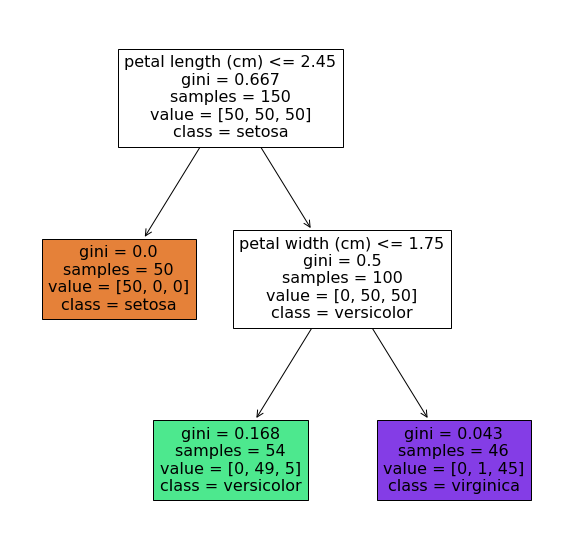

In [9]:
import sklearn

plt.figure(figsize=(10,10))
sklearn.tree.plot_tree(tree_clf,
                      feature_names = iris.feature_names[2:],
                      class_names = iris.target_names,
                      filled = True);

x1s: [0.         0.07575758 0.15151515 0.22727273 0.3030303  0.37878788
 0.45454545 0.53030303 0.60606061 0.68181818 0.75757576 0.83333333
 0.90909091 0.98484848 1.06060606 1.13636364 1.21212121 1.28787879
 1.36363636 1.43939394 1.51515152 1.59090909 1.66666667 1.74242424
 1.81818182 1.89393939 1.96969697 2.04545455 2.12121212 2.1969697
 2.27272727 2.34848485 2.42424242 2.5        2.57575758 2.65151515
 2.72727273 2.8030303  2.87878788 2.95454545 3.03030303 3.10606061
 3.18181818 3.25757576 3.33333333 3.40909091 3.48484848 3.56060606
 3.63636364 3.71212121 3.78787879 3.86363636 3.93939394 4.01515152
 4.09090909 4.16666667 4.24242424 4.31818182 4.39393939 4.46969697
 4.54545455 4.62121212 4.6969697  4.77272727 4.84848485 4.92424242
 5.         5.07575758 5.15151515 5.22727273 5.3030303  5.37878788
 5.45454545 5.53030303 5.60606061 5.68181818 5.75757576 5.83333333
 5.90909091 5.98484848 6.06060606 6.13636364 6.21212121 6.28787879
 6.36363636 6.43939394 6.51515152 6.59090909 6.66666667 6.

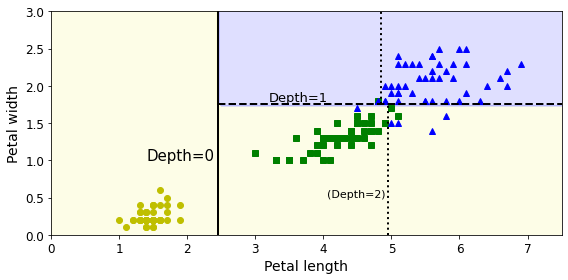

In [13]:

from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100) # 100 valores
    x2s = np.linspace(axes[2], axes[3], 100)  # 100 valores
    x1, x2 = np.meshgrid(x1s, x2s) # rejilla 2D
    print('x1s: ' + np.array_str(x1s))
    print()
    print('x2s: ' + np.array_str(x2s))
    print()
    print('x1: ' + np.array_str(x1))
    print()
    print('x2: ' + np.array_str(x2))
    print()
    print('x1.ravel(): ' + np.array_str(x1.ravel()))
    print()
    print('x2.ravel(): ' + np.array_str(x2.ravel()))
    print()
    

    X_new = np.c_[x1.ravel(), x2.ravel()] # ravel aplana en 1D, np.c_ añade en columna según tamaño ultimo elemento
    
    #X_new es un array numpy de dos columnas que recorre todos los posibles de mi gráfica
    # primera columna con valores del eje x, segunda columna con valores del eje y
    print('X_new: ' + np.array_str(X_new))
    print()
    
    y_pred = clf.predict(X_new).reshape(x1.shape)
    
    # predigo todos los puntos de mi grafica y los coloco
    # en sus posiciones ejex, ejey dentro de la tabla
    # (meshgrid no devuelve los puntos colocados ejex, ejey,
    # sino que devuelve todas las filas repetidas por cada columna
    # y todas las columnas repetidas por cada fila)
    
    print('x1.shape: ' + str(x1.shape))
    print()
    print('y_pred: ' + np.array_str(y_pred))
    print()
    
    
    # pintamos las zonas y fronteras
    
    custom_cmap = ListedColormap(['#fafab0','#9898ff'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "gs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "b^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

save_fig("decision_tree_decision_boundaries_plot")
plt.show();


# Predicting classes and class probabilities

In [14]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [15]:
tree_clf.predict([[5, 1.5]])

array([1])

# Sensitivity to training set details
The main issue with Decision Trees is that they are very sensitive to small variations in the training data. For example, if you just remove the widest Iris versicolor from the iris training set (the one with petals 4.8 cm long and 1.8 cm wide) and train a new Decision Tree, you may get the model represented before. As you can see, it looks very different from the previous Decision Tree.

In [17]:
X[    (X[:,1]== X[:,1][y==1].max()) & (y==1)       ] # widest iris versicolor flower
# hace falta & (y==1) para que eligiendo el ancho de petalo de versicolor mas grande
# con esa medida nos quedemos con versicolor

array([[4.8, 1.8]])

In [18]:
not_widest_versicolor = (X[:, 1]!=1.8) 
X_tweaked = X[not_widest_versicolor]
y_tweaked = y[not_widest_versicolor]

tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf_tweaked.fit(X_tweaked, y_tweaked)

DecisionTreeClassifier(max_depth=2, random_state=42)

x1s: [0.         0.07575758 0.15151515 0.22727273 0.3030303  0.37878788
 0.45454545 0.53030303 0.60606061 0.68181818 0.75757576 0.83333333
 0.90909091 0.98484848 1.06060606 1.13636364 1.21212121 1.28787879
 1.36363636 1.43939394 1.51515152 1.59090909 1.66666667 1.74242424
 1.81818182 1.89393939 1.96969697 2.04545455 2.12121212 2.1969697
 2.27272727 2.34848485 2.42424242 2.5        2.57575758 2.65151515
 2.72727273 2.8030303  2.87878788 2.95454545 3.03030303 3.10606061
 3.18181818 3.25757576 3.33333333 3.40909091 3.48484848 3.56060606
 3.63636364 3.71212121 3.78787879 3.86363636 3.93939394 4.01515152
 4.09090909 4.16666667 4.24242424 4.31818182 4.39393939 4.46969697
 4.54545455 4.62121212 4.6969697  4.77272727 4.84848485 4.92424242
 5.         5.07575758 5.15151515 5.22727273 5.3030303  5.37878788
 5.45454545 5.53030303 5.60606061 5.68181818 5.75757576 5.83333333
 5.90909091 5.98484848 6.06060606 6.13636364 6.21212121 6.28787879
 6.36363636 6.43939394 6.51515152 6.59090909 6.66666667 6.

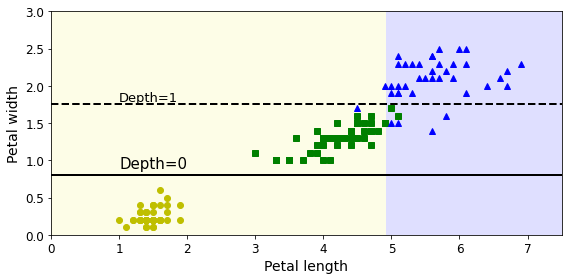

In [19]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X_tweaked, y_tweaked, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=13)

save_fig("decision_tree_instability_plot")
plt.show()

# vemos que las regiones de decisión cambian completamente

On the left the Decision Tree is trained with the default hyperparameters (i.e., no restrictions), and on the right it’s trained with min_samples_leaf=4. It is quite obvious that the model on the left is overfitting, and the model on the right will probably generalize better.

x1s: [-1.5        -1.45959596 -1.41919192 -1.37878788 -1.33838384 -1.2979798
 -1.25757576 -1.21717172 -1.17676768 -1.13636364 -1.0959596  -1.05555556
 -1.01515152 -0.97474747 -0.93434343 -0.89393939 -0.85353535 -0.81313131
 -0.77272727 -0.73232323 -0.69191919 -0.65151515 -0.61111111 -0.57070707
 -0.53030303 -0.48989899 -0.44949495 -0.40909091 -0.36868687 -0.32828283
 -0.28787879 -0.24747475 -0.20707071 -0.16666667 -0.12626263 -0.08585859
 -0.04545455 -0.00505051  0.03535354  0.07575758  0.11616162  0.15656566
  0.1969697   0.23737374  0.27777778  0.31818182  0.35858586  0.3989899
  0.43939394  0.47979798  0.52020202  0.56060606  0.6010101   0.64141414
  0.68181818  0.72222222  0.76262626  0.8030303   0.84343434  0.88383838
  0.92424242  0.96464646  1.00505051  1.04545455  1.08585859  1.12626263
  1.16666667  1.20707071  1.24747475  1.28787879  1.32828283  1.36868687
  1.40909091  1.44949495  1.48989899  1.53030303  1.57070707  1.61111111
  1.65151515  1.69191919  1.73232323  1.77272727

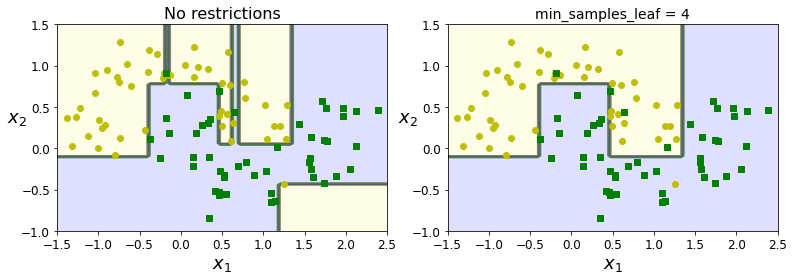

In [20]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4,
                                        random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.5, -1, 1.5],
                       iris=False)
plt.title("No restrictions", fontsize=16)
plt.subplot(122)
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.5, -1, 1.5],
                       iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf),
          fontsize=14)

save_fig("min_samples_leaf_plot")
plt.show()

x1s: [0.5        0.57070707 0.64141414 0.71212121 0.78282828 0.85353535
 0.92424242 0.99494949 1.06565657 1.13636364 1.20707071 1.27777778
 1.34848485 1.41919192 1.48989899 1.56060606 1.63131313 1.7020202
 1.77272727 1.84343434 1.91414141 1.98484848 2.05555556 2.12626263
 2.1969697  2.26767677 2.33838384 2.40909091 2.47979798 2.55050505
 2.62121212 2.69191919 2.76262626 2.83333333 2.9040404  2.97474747
 3.04545455 3.11616162 3.18686869 3.25757576 3.32828283 3.3989899
 3.46969697 3.54040404 3.61111111 3.68181818 3.75252525 3.82323232
 3.89393939 3.96464646 4.03535354 4.10606061 4.17676768 4.24747475
 4.31818182 4.38888889 4.45959596 4.53030303 4.6010101  4.67171717
 4.74242424 4.81313131 4.88383838 4.95454545 5.02525253 5.0959596
 5.16666667 5.23737374 5.30808081 5.37878788 5.44949495 5.52020202
 5.59090909 5.66161616 5.73232323 5.8030303  5.87373737 5.94444444
 6.01515152 6.08585859 6.15656566 6.22727273 6.2979798  6.36868687
 6.43939394 6.51010101 6.58080808 6.65151515 6.72222222 6.79

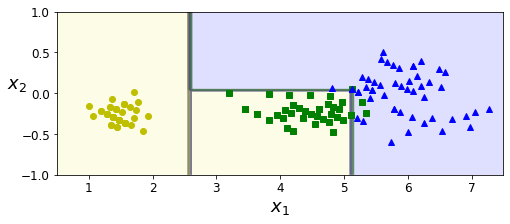

In [21]:

angle = np.pi / 180 * 20
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xr = X.dot(rotation_matrix)

tree_clf_r = DecisionTreeClassifier(random_state=42)
tree_clf_r.fit(Xr, y)

plt.figure(figsize=(8, 3))
plot_decision_boundary(tree_clf_r, Xr, y, axes=[0.5, 7.5, -1.0, 1], iris=False)

plt.show()

x1s: [-0.7        -0.68585859 -0.67171717 -0.65757576 -0.64343434 -0.62929293
 -0.61515152 -0.6010101  -0.58686869 -0.57272727 -0.55858586 -0.54444444
 -0.53030303 -0.51616162 -0.5020202  -0.48787879 -0.47373737 -0.45959596
 -0.44545455 -0.43131313 -0.41717172 -0.4030303  -0.38888889 -0.37474747
 -0.36060606 -0.34646465 -0.33232323 -0.31818182 -0.3040404  -0.28989899
 -0.27575758 -0.26161616 -0.24747475 -0.23333333 -0.21919192 -0.20505051
 -0.19090909 -0.17676768 -0.16262626 -0.14848485 -0.13434343 -0.12020202
 -0.10606061 -0.09191919 -0.07777778 -0.06363636 -0.04949495 -0.03535354
 -0.02121212 -0.00707071  0.00707071  0.02121212  0.03535354  0.04949495
  0.06363636  0.07777778  0.09191919  0.10606061  0.12020202  0.13434343
  0.14848485  0.16262626  0.17676768  0.19090909  0.20505051  0.21919192
  0.23333333  0.24747475  0.26161616  0.27575758  0.28989899  0.3040404
  0.31818182  0.33232323  0.34646465  0.36060606  0.37474747  0.38888889
  0.4030303   0.41717172  0.43131313  0.4454545

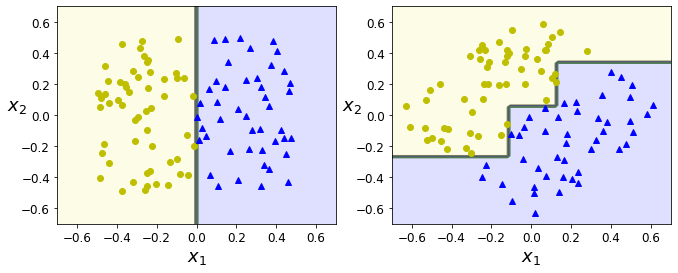

In [22]:

np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7],
                       iris=False)
plt.subplot(122)
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7],
                       iris=False)


# Regression trees

In [23]:
# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [25]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X,y)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [5]:

'''
def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.subplot(122)
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

save_fig("tree_regression_plot")
plt.show()
'''

'\ndef plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):\n    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)\n    y_pred = tree_reg.predict(x1)\n    plt.axis(axes)\n    plt.xlabel("$x_1$", fontsize=18)\n    if ylabel:\n        plt.ylabel(ylabel, fontsize=18, rotation=0)\n    plt.plot(X, y, "b.")\n    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\\hat{y}$")\n\nplt.figure(figsize=(11, 4))\nplt.subplot(121)\nplot_regression_predictions(tree_reg1, X, y)\nfor split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):\n    plt.plot([split, split], [-0.2, 1], style, linewidth=2)\nplt.text(0.21, 0.65, "Depth=0", fontsize=15)\nplt.text(0.01, 0.2, "Depth=1", fontsize=13)\nplt.text(0.65, 0.8, "Depth=1", fontsize=13)\nplt.legend(loc="upper center", fontsize=18)\nplt.title("max_depth=2", fontsize=14)\n\nplt.subplot(122)\nplot_regression_predictions(tree_reg2, X, y, ylabel=None)\nfor split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--"

In [6]:

'''
plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.subplot(122)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

save_fig("tree_regression_regularization_plot")
plt.show()
'''

'\nplt.figure(figsize=(11, 4))\n\nplt.subplot(121)\nplt.plot(X, y, "b.")\nplt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\\hat{y}$")\nplt.axis([0, 1, -0.2, 1.1])\nplt.xlabel("$x_1$", fontsize=18)\nplt.ylabel("$y$", fontsize=18, rotation=0)\nplt.legend(loc="upper center", fontsize=18)\nplt.title("No restrictions", fontsize=14)\n\nplt.subplot(122)\nplt.plot(X, y, "b.")\nplt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\\hat{y}$")\nplt.axis([0, 1, -0.2, 1.1])\nplt.xlabel("$x_1$", fontsize=18)\nplt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)\n\nsave_fig("tree_regression_regularization_plot")\nplt.show()\n'